# Models without Dimensionality Reduction (2 class)

## Import library and dataset

In [26]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
#import tkinter
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scikitplot as skplt
import seaborn as sns
sns.set(style="whitegrid")

#from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn import model_selection

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.use('TKAgg')
%matplotlib inline

## Load Dataset, Replace Class, Scaling

In [50]:
# Load 2 datasets
dfC = pd.read_csv("MeterC",sep='\t',header=None, names=['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42','class'])
dfD = pd.read_csv("MeterD",sep='\t',header=None, names=['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42','class'])

# replace class
dfC['class'].replace(1, 0,inplace=True)
dfC['class'].replace(2, 1,inplace=True)
dfC['class'].replace(3, 1,inplace=True)
dfC['class'].replace(4, 1,inplace=True)
dfD['class'].replace(1, 0,inplace=True)
dfD['class'].replace(2, 1,inplace=True)
dfD['class'].replace(3, 1,inplace=True)
dfD['class'].replace(4, 1,inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['flatr','symm','crossf','v1','v2','v3','v4','sos1','sos2','sos3','sos4','ss11','ss12','ss21','ss22','ss31','ss32','ss41','ss42','sq11','sq12','sq21','sq22','sq31','sq32','sq41','sq42','gain11','gain12','gain21','gain22','gain31','gain32','gain41','gain42','tt11','tt12','tt21','tt22','tt31','tt32','tt41','tt42']

X = dfC.loc[:, features].values
y = dfC.loc[:,['class']].values
X = scaler.fit_transform(X)

#process for dataset D
Xd = dfD.loc[:, features].values
yd = dfD.loc[:,['class']].values
Xd = scaler.fit_transform(Xd)

#change the shape of y from column array to horizontal array or (n_samples, ) using ravel().
y = y.ravel()
print('y class',dfC['class'].unique())
yd = yd.ravel()
print('yd class',dfD['class'].unique())

y class [0 1]
yd class [0 1]


## Evaluate using K-fold validation

In [56]:
#classifier models
clfNB = GaussianNB()
clfKNN = KNeighborsClassifier(n_neighbors=5)
clfSVM = svm.SVC(kernel='linear', C=1, probability=True)
clfRF = RandomForestClassifier(max_depth=2, random_state=0)
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=2500)

n_folds = [5,10]
targets = [clfNB,clfKNN,clfSVM,clfRF,clfNN]
models = ['Bayes','KNN','SVM','RF','ANN']
# Computing training scores to get insights on how different parameter settings impact the overfitting/underfitting trade-off. 
# However computing the scores on the training set can be computationally expensive and is not strictly required 
# to select the parameters that yield the best generalization performance

print("\n{:>10} | {:>10} | {:>8} | {:>10} | {:>10} | {:>9},{:>9},{:>7} | {:>9},{:>9},{:>8}".format('Classifier', 'Test_Accy_5f', 'Test_Accy_10f', 'Val_Accy_5f','Val_Accy_10f','F1micro5','F1macro5','F1avg5','F1micro10','F1macro10','F1avg10'))
print('-----------------------------------------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    # K-fold cross validation for the training dataset (Dataset C)
    cv5 = cross_validate(i, X, y, cv=5, return_train_score=True) # == cvScore = cross_val_score(i, X, y, cv=5)
    cv10 = cross_validate(i, X, y, cv=10, return_train_score=True)    
    cv5mean = np.round(cv5['test_score'].mean(),decimals=3)
    cv10mean = np.round(cv10['test_score'].mean(),decimals=3)
    # K-fold cross validation and predict for the validation dataset (Dataset D)
    y_pred5 = cross_val_predict(i, Xd, yd, cv=5)
    y_pred10 = cross_val_predict(i, Xd, yd, cv=10)
    # Evaluate performance for validation score
    accuracy5 = np.round(accuracy_score(yd, y_pred5),decimals=3)
    accuracy10 = np.round(accuracy_score(yd, y_pred10),decimals=3)
    f1micro5 = np.round(f1_score(yd, y_pred5, average='macro'),decimals=3)
    f1macro5 = np.round(f1_score(yd, y_pred5, average='micro'),decimals=3)
    f1avg5 = np.round(f1_score(yd, y_pred5, average='weighted'),decimals=3)
    f1micro10 = np.round(f1_score(yd, y_pred10, average='macro'),decimals=3)
    f1macro10 = np.round(f1_score(yd, y_pred10, average='micro'),decimals=3)
    f1avg10 = np.round(f1_score(yd, y_pred10, average='weighted'),decimals=3)
    print("{:>10} | {:>12} | {:>13} | {:>11} | {:>11}  | {:>9}{:>9}{:>9} | {:>9}{:>9}{:>9}".format(j,cv5mean,cv10mean,accuracy5,accuracy10,f1micro5,f1macro5,f1avg5,f1micro10,f1macro10,f1avg10))



Classifier | Test_Accy_5f | Test_Accy_10f | Val_Accy_5f | Val_Accy_10f |  F1micro5, F1macro5, F1avg5 | F1micro10,F1macro10, F1avg10
-----------------------------------------------------------------------------------------------------------------------------------
     Bayes |        0.551 |          0.55 |       0.672 |       0.672  |     0.669    0.672    0.684 |     0.669    0.672    0.684
       KNN |        0.596 |         0.779 |       0.711 |       0.756  |     0.631    0.711    0.705 |     0.703    0.756    0.757
       SVM |        0.597 |         0.774 |        0.75 |       0.828  |     0.694     0.75    0.751 |     0.769    0.828    0.819
        RF |        0.658 |         0.824 |       0.756 |         0.8  |     0.674    0.756    0.745 |     0.729      0.8    0.789
       ANN |        0.629 |         0.867 |       0.722 |       0.722  |     0.658    0.722    0.722 |     0.695    0.722    0.734


## Evaluate using Train and Test set

In [13]:
#split dataset into train and test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=100)

In [14]:
print("\n{:>10} | {:>10} | {:>10} | {:>9},{:>9},{:>7} | {:>9},{:>9},{:>8}".format('Classifier', 'AccuracyC','AccuracyD','F1microC','F1macroC','F1avgC','F1microD','F1macroD','F1avgD'))
print('-------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    i.fit(X_train, Y_train) # train the model
    accuracyC = np.round(i.score(X_test, Y_test),decimals=3) # Calc accuracy score for the training dataset (Dataset C)
    accuracyD = np.round(i.score(Xd, yd),decimals=3) # Calc accuracy score for the validation dataset (Dataset D)
    # Evaluate performance for validation score
    y_predC = i.predict(X_test)
    y_predD = i.predict(Xd)
    f1microC = np.round(f1_score(Y_test, y_predC, average='macro'),decimals=3)
    f1macroC = np.round(f1_score(Y_test, y_predC, average='micro'),decimals=3)
    f1avgC = np.round(f1_score(Y_test, y_predC, average='weighted'),decimals=3)
    f1microD = np.round(f1_score(yd, y_predD, average='macro'),decimals=3)
    f1macroD = np.round(f1_score(yd, y_predD, average='micro'),decimals=3)
    f1avgD = np.round(f1_score(yd, y_predD, average='weighted'),decimals=3)
    print("{:>10} | {:>10} | {:>10} | {:>9}{:>9}{:>9} | {:>9}{:>9}{:>9}".format(j,accuracyC,accuracyD,f1microC,f1macroC,f1avgC,f1microD,f1macroD,f1avgD))



Classifier |  AccuracyC |  AccuracyD |  F1microC, F1macroC, F1avgC |  F1microD, F1macroD,  F1avgD
-------------------------------------------------------------------------------------------------
     Bayes |      0.432 |      0.717 |     0.432    0.432    0.432 |     0.417    0.717    0.598
       KNN |      0.919 |       0.65 |     0.875    0.919    0.917 |     0.459     0.65    0.598
       SVM |      0.838 |      0.711 |     0.653    0.838    0.797 |     0.416    0.711    0.596
        RF |      0.919 |      0.811 |      0.86    0.919    0.912 |     0.791    0.811    0.819
       ANN |        1.0 |      0.706 |       1.0      1.0      1.0 |     0.431    0.706    0.602


## Classification Reports

In [27]:
for i,j in zip(targets,models):
    i.fit(X_train, Y_train)
    y_pred = i.predict(X_test)
    print(j,'Classification Report for Test Set:\n', classification_report(Y_test, y_pred))
print('-------------------------------------------------------------------------------------------------')
for i,j in zip(targets,models):
    i.fit(X_train, Y_train)
    y_pred = i.predict(Xd)
    print(j,'Classification Report for Validation Set:\n', classification_report(yd, y_pred))


Bayes Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.28      1.00      0.43         8
           1       1.00      0.28      0.43        29

    accuracy                           0.43        37
   macro avg       0.64      0.64      0.43        37
weighted avg       0.84      0.43      0.43        37

KNN Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.93      0.97      0.95        29

    accuracy                           0.92        37
   macro avg       0.90      0.86      0.87        37
weighted avg       0.92      0.92      0.92        37

SVM Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.83      1.00      0.91        29

    accuracy                           0.84        37
   

C:\Users\SMFIRDAUS\miniconda3\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



RF Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.62      0.88      0.73        51
           1       0.94      0.78      0.86       129

    accuracy                           0.81       180
   macro avg       0.78      0.83      0.79       180
weighted avg       0.85      0.81      0.82       180

ANN Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.25      0.02      0.04        51
           1       0.72      0.98      0.83       129

    accuracy                           0.71       180
   macro avg       0.48      0.50      0.43       180
weighted avg       0.58      0.71      0.60       180



## Confusion Matrix

In [58]:
for i,j in zip(targets,models):
    # K-fold cross validation for the training dataset (Dataset C)
    y_predC5 = cross_val_predict(i, X, y, cv=5)
   # print(j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    print('\n',j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    
print('--------------------------------------------------------')
      
for i,j in zip(targets,models):
    # K-fold cross validation and predict for the validation dataset (Dataset D)
    y_predD5 = cross_val_predict(i, Xd, yd, cv=5)
   # print(j,'Confusion Matrix for Test Set (5-fold):\n',confusion_matrix(y, y_predC5))
    print('\n',j,'Confusion Matrix for Validation Set (5-fold):\n',confusion_matrix(yd, y_predD5))


 Bayes Confusion Matrix for Test Set (5-fold):
 [[54  0]
 [81 46]]

 KNN Confusion Matrix for Test Set (5-fold):
 [[30 24]
 [49 78]]

 SVM Confusion Matrix for Test Set (5-fold):
 [[20 34]
 [39 88]]

 RF Confusion Matrix for Test Set (5-fold):
 [[ 18  36]
 [ 26 101]]

 ANN Confusion Matrix for Test Set (5-fold):
 [[40 14]
 [53 74]]
--------------------------------------------------------

 Bayes Confusion Matrix for Validation Set (5-fold):
 [[51  0]
 [59 70]]

 KNN Confusion Matrix for Validation Set (5-fold):
 [[ 22  29]
 [ 23 106]]

 SVM Confusion Matrix for Validation Set (5-fold):
 [[ 29  22]
 [ 23 106]]

 RF Confusion Matrix for Validation Set (5-fold):
 [[ 23  28]
 [ 16 113]]

 ANN Confusion Matrix for Validation Set (5-fold):
 [[ 26  25]
 [ 25 104]]


## ROC and AUC

In [52]:
print('ROC AUC for Train & Test')
print("\n{:>10} | {:>15} | {:>15}".format('Classifier', 'AUCscore_Test','AUCscore_Validation'))
print('--------------------------------------------------')
for i,j in zip(targets,models):
    i.fit(X_train, Y_train) # train the model
    y_predC = i.predict(X_test)
    y_predD = i.predict(Xd)
    
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predC, pos_label=None)
    roc_aucT = np.round(metrics.auc(fpr, tpr),decimals=4)
    #alternative: score_roc_aucT = np.round(roc_auc_score(Y_test, y_predC),decimals=4)
    
    fpr, tpr, thresholds = metrics.roc_curve(yd, y_predD, pos_label=None)
    roc_aucV = np.round(metrics.auc(fpr, tpr),decimals=4)
    #alternative: score_roc_aucV = np.round(roc_auc_score(yd, y_predD),decimals=4)
    
    print("{:>10} | {:>15} | {:>15}".format(j,roc_aucT,roc_aucV))

ROC AUC for Train & Test

Classifier |   AUCscore_Test | AUCscore_Validation
--------------------------------------------------
     Bayes |          0.6379 |             0.5
       KNN |          0.8578 |          0.4831
       SVM |           0.625 |          0.4961
        RF |          0.8125 |          0.8326
       ANN |             1.0 |          0.4982


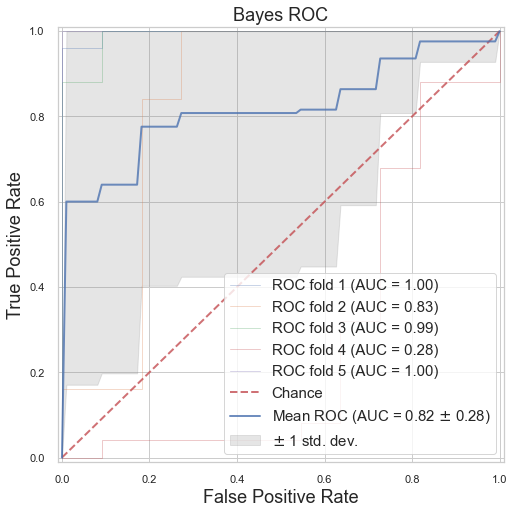

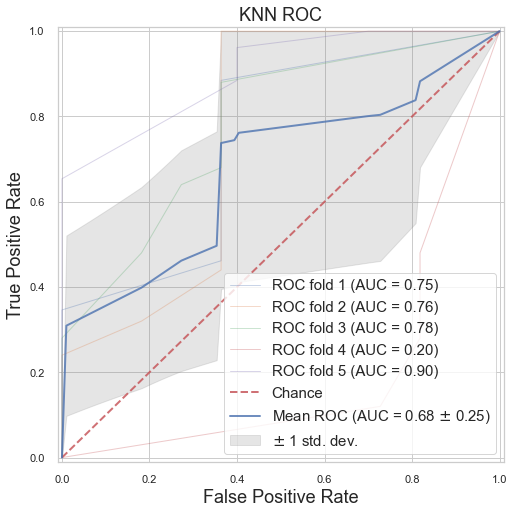

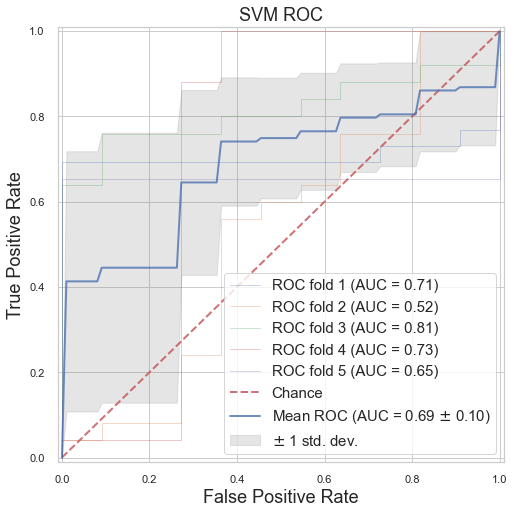

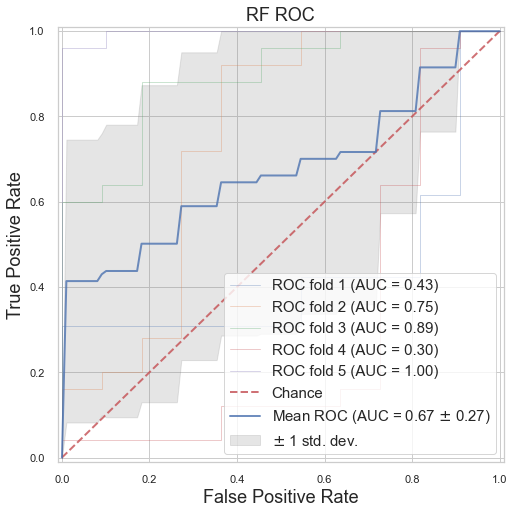

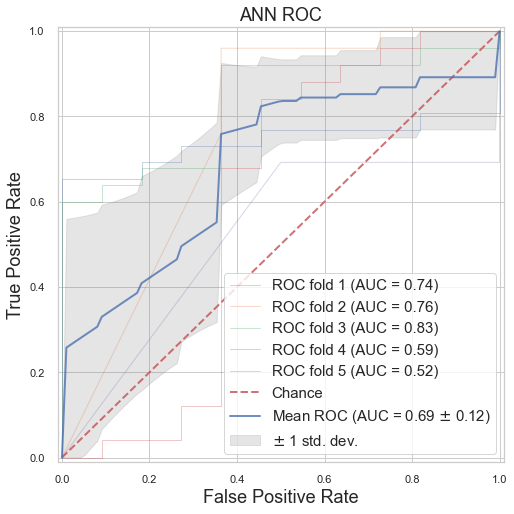

In [73]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)
#classifier = SVC(kernel='sigmoid',probability=True,random_state=0)
targets = [clfNB,clfKNN,clfSVM, clfRF,clfNN]
models = ['Bayes','KNN','SVM','RF','ANN']

for k,j in zip(targets,models):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(8,8))
    i = 0
    for train, test in cv.split(X, y):
        probas_ = k.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title(str(j) + ' ROC',fontsize=18)
    plt.legend(loc="lower right", prop={'size': 15})
    plt.show()

## Tuning KNN

[0.8444444444444444, 0.706140350877193, 0.7008771929824562, 0.6622807017543859, 0.7789473684210527, 0.7233918128654971, 0.7456140350877194, 0.712280701754386, 0.739766081871345, 0.7286549707602339, 0.7286549707602339, 0.639766081871345, 0.6453216374269006, 0.6397660818713451, 0.6078947368421053, 0.5801169590643275, 0.5801169590643275, 0.5523391812865497, 0.5634502923976608, 0.5578947368421052, 0.535672514619883, 0.535672514619883, 0.535672514619883, 0.5467836257309941, 0.6634502923976608, 0.635672514619883, 0.6690058479532164, 0.6304093567251463, 0.7078947368421052, 0.6912280701754385]


Text(0, 0.5, 'Cross-validated accuracy')

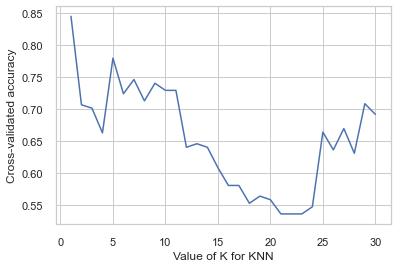

In [56]:
# search for an optimal value of K for KNN

k_range = range(1, 31)
k_scores = []

for k in k_range:
    clfKNN2 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clfKNN2, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

We choose 5 as the optimum K number